# CFD Results Post-Process

**The final step for the development of a CFD simulation for a problem of interest is to process and examine the validity of the obtained numerical results (a.k.a post-processing and validation step). This steps requires an in-depth engineering knowledge about the fundamentals of the physical problem of interest. Thus, the value of investing time in understanding the fundamental physics of the flow, once again is highlighted here. This process is done starting from general inspection on CFD simulation results and ends with more detail validation process.**

The obtained results for 3D flow over in circular pipe with Reynolds of 64 is processed and discussed in this section. The first general rule of thumb to check the convergence of a CFD simulation is to check the residual and error values for key flow variables, such as continuity, velocity and pressure. In OpenFoam the residual values for velocity components and pressure along with error values for continuity are printed out at each time step as set in the <span style=style="background-color:lightgrey;">controlDict</span> dictionary file. A sample of time report is shown below for the last time step <span style=style="background-color:lightgrey;">t=50</span>:

```C++
Time = 50

smoothSolver:  Solving for Ux, Initial residual = 2.26587e-09, Final residual = 2.26587e-09, No Iterations 0
smoothSolver:  Solving for Uy, Initial residual = 3.40393e-06, Final residual = 7.1465e-08, No Iterations 4
smoothSolver:  Solving for Uz, Initial residual = 3.20175e-06, Final residual = 7.03715e-08, No Iterations 4
GAMG:  Solving for p, Initial residual = 2.77679e-07, Final residual = 2.77679e-07, No Iterations 0
time step continuity errors : sum local = 2.00956e-06, global = 1.00862e-08, cumulative = 0.00555295
ExecutionTime = 364.26 s  ClockTime = 365 s

```

The residual value of each variable denotes how the the numerical value of that variable is differing from the previous time step. Low value of residual indicates the obtained numerical value of the variable of interest has converged to a specific value. In this simulation this is true for <span style=style="background-color:lightgrey;">U_x</span> , <span style=style="background-color:lightgrey;">U_y</span> and <span style=style="background-color:lightgrey;">p</span> that have residual values by order of $1e-08$. The reported <span style=style="background-color:lightgrey;">continuity errors</span> defines how the obtained relevant variables are satisfying the continuity equation. The global continuity error with order of $1e-08$ in this problem confirms that continuity equation is being satisfied.

Once the simulation is ran in OpenFoam the user can make and plot the trend of evolution for different variables. Users should first run the command <span style=style="background-color:lightgrey;">foamJob[application name]</span> ( i.e. <span style=style="background-color:lightgrey;">foamJob simpleFoam</span> here ). This command will create a `log` file including the convergence history of different flow field variables. Then user should run <span style=style="background-color:lightgrey;">foamLog log</span> command inside the main working directory. This command will read the previously made <span style=style="background-color:lightgrey;">log</span> file and creates a history of log files for different flow field variables inside a new directory called <span style=style="background-color:lightgrey;">logs</span>. This process was done for simulation with Re=64 and generated log files were visualized running the following commands while locating in the <span style=style="background-color:lightgrey;">logs</span> folder:

```C++
gnuplot
gnuplot> set logscale y #sets logarithmic scale of y axis
gnuplot> plot './contLocal_0' with lines, './UxFinalRes_0' with lines, './pFinalRes_0' with lines #plots residuals
```   

<img src="./Images/residuals_Re64.png" width="500" align="middle">
Fig. 1 visualizes the residual values of $U_x$ and $p$ with the continuity error values versus time steps.

Fig. 1 visualizes the residual values of $U_x$ and $p$ with the continuity error values versus time steps. The general decreasing trend of the residual and error values confirm that the numerical solution of the conservation/governing equations are converging to specific final values. It is interesting to point out that the residual values become almost constant after about 20 seconds. This show that the flow becomes fully developed and steady state. This decreasing trend is the first necessary, but not sufficient, general criteria to confirm the convergence of the CFD simulation.

The second step is to visualize dimensionless form of the important variables within the CFD domain. This visualization step can be problem specific and should be performed over an adequate plane of choice. In OpenFoam the post-processing is recommended to be done in <span style=style="background-color:lightgrey;">ParaView</span>, which is the recommended post-processor package of OpenFoam. Running the command

```C++
paraFoam
```

in the terminal, while locating in the working directory of the simulation will simply read all obtained numerical results and get it ready for post-processing. Once the user ran <span style=style="background-color:lightgrey;">paraFoam</span> command and the software load up, hitting the <span style=style="background-color:lightgrey;">Apply</span> bottom under <span style=style="background-color:lightgrey;">properties</span> window will load the numerical results.

For most of the problems contour of normalized velocity or pressure, over a horizontal or vertical plane at the center of the CFD domain, is a good post-processing start point. For the current problem, since the entire domain is two dimensional and planar, it would make the entire domain the best candidate for the post-processing plane. User should now define the normalized variable of interest that needs to be visualized. Defining variables can be done via <span style=style="background-color:lightgrey;">Calculator</span> by simply clicking on the calculator icon on top left of the paraFoam window. This command will open a new panel under properties, where users can define their variable of interest. Name the variable (i.e. `Ux/U0`) and enter the required formula for the normalized variable of interest (i.e. `U_x/64`) and hit <span style=style="background-color:lightgrey;">Apply</span>. This will calculate the normalized streamwise velocity with free stream velocity within entire CFD domain for all the time steps. Since the CFD domain in this case study is 3D user should extract a plane to visualize the temporal evolution of the flow field along it. This can be done via <span style=style="background-color:lightgrey;">Slice</span> button on the top left of the paraFoam window. This command would require the origin and normal vector to create this plane (slice) within the CFD domain. It is recommended to define this plane in the heart of the CFD domain, therefore the origin of <span style=style="background-color:lightgrey;">(0,0,0)</span> and normal vector of <span style=style="background-color:lightgrey;">z-axis</span> is set to define this plane. Now with using the `play` bottom users can see the formation of laminar boundary layer, from `t=0` to `t=50` across the domain:

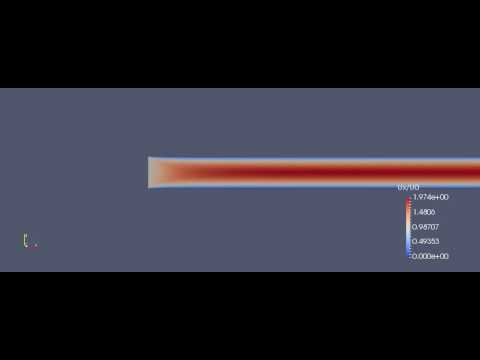

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("DxVX5hPZVEM")

<img src="./Images/velocity_cont.png" width="500" align="middle">
Fig.2 - Contours of normalized streamwise velocity with the free stream velocity in a rectangular pipe for Reynolds numbers of 64.

Fig. 2 visualizes the animation for temporal evolution of the normalized streamwise velocity with free stream for flow with Reynolds numbers of 64. Flow enters the pipe with normalized velocity of 1. Due to the imposed no slip boundary conditions on the pipe's walls, the velocity instantly decrease to zero at this region. The extreme change of momentum within the vertical direction creates a region at the entrance of the pipe, where the flow evolves in the streamwise direction. This specific length is referred to as the entrance length (discussed earlier in Physics section). After the entrance length the velocity profile becomes fully developed and holds it's shape to the end of the channel. It should also be highlighted that this velocity contour is smooth. The smoothness confirms the validity of created mesh resolution and convergence of the numerical solution. However, this is an additional necessary, but not sufficient criteria for simulation validity and convergence.

**After performing the general post-processing steps, the user need to perform more detail oriented post-processing to confirm the validity of the CFD simulation. This stage can be a state-of-the-art. Comparing the numerical results against the theory (discussed earlier) or any other available experimental results is the final stage of post-processing. It is extremely important to calculate the correct corresponding numerical variables and compare them against the experimental or other numerical data.**

In order to visualize the evolution of the velocity along the flow one should look at the streamwise velocity profiles at different stations downstream the pipe. Each station is defined as a vertical line at different distances downstream the pipe. In <span style=style="background-color:lightgrey;">paraFoam</span> users can visualize flow field variable of interest over lines inside the CFD domain using <span style=style="background-color:lightgrey;">Plot Over Line Option</span> icon on top center of the paraFoam window. Using this command one enters the start and end point of each measurement station as shown in the following table, where D is the diameter of the circular pipe (0.1 [m]) and x is the multiplier to define the distance downstream the inlet (x= 0.1, 0.5, 0.6, 0.9, 5, 10 and 50):

    
|#|x|y|z|
|---|---|---|---|
|Point1|x * D|-0.05|0
|Point2|x * D|+0.05|0

Once all these visualization stations were created user can specify the desired variables to visualize at each station. In this case the <span style=style="background-color:lightgrey;">X Axis Data</span> is set to <span style=style="background-color:lightgrey;">U_x/U0</span> and the <span style=style="background-color:lightgrey;">Line Series</span> is set to <span style=style="background-color:lightgrey;">Points (1)</span> in the <span style=style="background-color:lightgrey;">Properties</span> option of the selected <span style=style="background-color:lightgrey;">Filter</span>. Performing these setting for all these downstream stations a similar results will be obtained as follows:

<img src="./Images/velocity_profiles.png" width="500" align="middle">
Fig.3 - Evolution of streamwise velocity ($U_x/U_0$) across the pipe length for Reynolds of 10.

Figure 3 visualize the numerically predicted streamwise velocity profiles along the pipe at 0.1, 0.5, 0.6, 0.9, 5, 10 and 50 pipe's diameter downstream the inlet. Right after the pipe entrance, 0.1w=0.01 [m] downstream the inlet, velocity profile is shown with black dots. This profile has a skewed bell shape and is not even close to the discussed parabolic velocity profile in the Physics section! However, moving further downstream, at 0.5w=0.06 [m] downstream the inlet, velocity profiles starts to get a parabolic shape as shown by red dots in Fig. 3. This evolution continues to happen until the 5w station downstream the inlet. After this station the velocity profile gets fully developed and does not evolve anymore. Therefore the plotted velocity profiles fall right on top of each other at next downstream stations.

As the final step for validation one can compare the numerically predicted entrance length and the fully developed velocity profile against the theoretically derived equation parabolic velocity profile. 

The experimental approximation of the entrance length discussed in Physics section is defined via the empirical relation as follows:

$$ L_e = 0.05 . Re_{D_h} . D_h$$

Where $Re_{D_h}$ is the Reynolds number of the pipe based on the pipe's diameter. $D_h$ is the hydraulic diameter of the pipe and is equal to the diameter of the circular pipe. For this simulation:

$$ L_e = 0.05 * 64 * 0.1 = 0.32~[m]$$

Users can plot the numerically predicted streamwise velocity versus the calculated theoretical velocity at the 3.2 * D  downstream stations together to confirm that 0.32 [m] is the entrance length of this pipe flow and that the numerically simulated fully developed velocity profile matches the theoretical one with an acceptable level of accuracy. Users can define the theoretical velocity profile using `Filters/Data Analysis/Calculator`. This command will open a new panel under properties, where users can define their variable of interest. Name your variable (i.e. theory_velocity) and put the following formula $1.93 * (1-(\frac{2*coordsY}{0.1})^2)$. In this formula 19.3 is the maximum centerline velocity as shown in the previous results. At this stage, similar to the previous post-processing step, user van plot the newly calculated variable and the previously plotted streamwise velocity profile at 3.2 * w on top of each other as shown in Fig.4 below:

<img src="./Images/velocity_comparison.png" width="500" align="middle">

Fig.4 - Comparison between the theoretically derived and numerically predicted velocity profiles along the pipe flow.

The visualized comparison reveals that the CFD simulation is fully capable of predicting the theoretically derived values of entrance length as well as the fully developed velocity field across the pipe. At this stage one can conclude that this CFD numerical simulation is validated to study 3D laminar flow in a circular pipe. Therefore, it can be used for similar or more complex problems, such as flow with specified pressure gradient, non-uniform velocity profiles and etc.. This can be done via correct implementation in changing the corresponding boundary conditions.